In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Populating the interactive namespace from numpy and matplotlib


In [2]:
#from keras import models
#from keras import layers
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
df_good1 = pd.read_csv('likely_matches_plane.csv')

In [4]:
df_good1

,ens,csc2_pref,csc2_id,csc2_ra,csc2_dec,csc2_mjr,csc2_mnr,csc2_alpha,tic_id,gaia_ra,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,ruwe,objID,mag,Separation
0,2,2CXO,J172249.6-340731,260.706734,-34.125397,0.564860,0.498994,149.326996,157069725,260.706845,...,NaN,NaN,NaN,NaN,NaN,NaN,1.051552,5976081920165540608,17.63650,4.844400e-07
1,2,2CXO,J172251.0-341740,260.712829,-34.294690,1.689860,1.689860,0.000000,157067351,260.712794,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992697,5976075426174823552,17.71515,1.806797e-07
2,2,2CXO,J172251.9-340641,260.716280,-34.111631,0.405358,0.403091,154.184006,157069916,260.716463,...,0.717821,0.673574,0.814876,0.166019,0.164051,0.167986,0.858655,5976082023244783488,13.07753,4.127832e-07
3,2,2CXO,J172256.1-340911,260.733861,-34.153061,0.566628,0.492231,127.488991,157069319,260.733961,...,NaN,NaN,NaN,NaN,NaN,NaN,1.093276,5976081649585027456,15.53457,4.225821e-07
4,2,2CXO,J172256.4-340535,260.735411,-34.093298,0.561330,0.561330,0.000000,1547317350,260.735628,...,NaN,NaN,NaN,NaN,NaN,NaN,0.963171,5976105529599458688,18.23404,2.948014e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27071,4376,2CXO,J124901.5-623904,192.256408,-62.651153,0.597798,0.486344,28.388000,369628466,192.256156,...,0.764010,0.728041,0.802373,0.304225,0.302448,0.306001,0.899785,6055230612595938944,11.73272,1.008053e-07
27072,4376,2CXO,J124906.7-623449,192.278297,-62.580504,1.056691,0.775569,28.016001,369627672,192.278491,...,NaN,NaN,NaN,NaN,NaN,NaN,13.585671,6055232158784202112,15.07246,2.446120e-07
27073,4376,2CXO,J124938.4-624331,192.410074,-62.725555,1.088670,1.088670,0.000000,434930797,192.410183,...,NaN,NaN,NaN,NaN,NaN,NaN,1.747122,5863073122951472384,16.72262,3.468000e-07
27074,4376,2CXO,J124938.7-624353,192.411462,-62.731519,0.786859,0.583495,58.324001,434918647,192.411283,...,0.799687,0.621038,0.899553,0.156585,0.153811,0.159358,1.030859,5863073054231980672,14.60327,1.890382e-07


In [5]:
df_good = df_good1.loc[(df_good1['prob'] >= 0.95) & (df_good1['separation'] <= 0.2)]

In [48]:
df_good.columns[50:100]

Index(['astrometric_params_solved', 'astrometric_primary_flag',
       'astrometric_weight_al', 'astrometric_pseudo_colour',
       'astrometric_pseudo_colour_error', 'mean_varpi_factor_al',
       'astrometric_matched_observations', 'visibility_periods_used',
       'astrometric_sigma5d_max', 'frame_rotator_object_type',
       'matched_observations', 'duplicated_source', 'phot_g_n_obs',
       'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_bp_n_obs',
       'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs',
       'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'phot_proc_mode', 'bp_rp', 'bp_g', 'g_rp',
       'radial_velocity', 'radial_velocity_error', 'rv_nb_transits',
       'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h',
       'phot_variable_

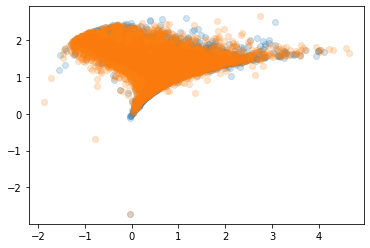

In [73]:
plt.scatter(df_good['bp_g'],df_good['g_rp'],alpha=0.2,)
plt.scatter(df_bad['bp_g'],df_bad['g_rp'],alpha=0.2)


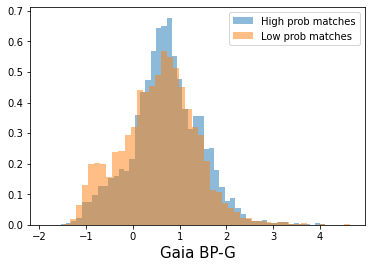

In [70]:
plt.hist(df_good['bp_g'],bins=50,alpha=0.5,density=True,label='High prob matches')
plt.hist(df_bad['bp_g'],bins=50,alpha=0.5,density=True,label='Low prob matches')
plt.xlabel('Gaia BP-G',size=15)
plt.legend()
plt.savefig('Gaia_BP_G.pdf',dpi=300)

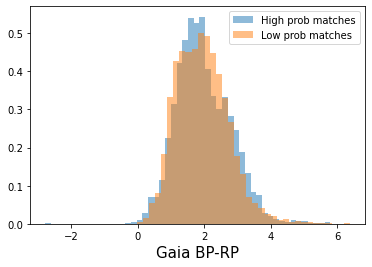

In [71]:
plt.hist(df_good['bp_rp'],bins=50,alpha=0.5,density=True,label='High prob matches')
plt.hist(df_bad['bp_rp'],bins=50,alpha=0.5,density=True,label='Low prob matches')
plt.xlabel('Gaia BP-RP',size=15)
plt.legend()
plt.savefig('Gaia_BP_RP.pdf',dpi=300)

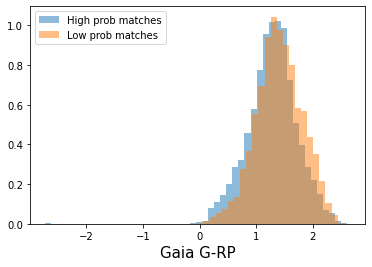

In [80]:
plt.hist(df_good['g_rp'],bins=50,alpha=0.5,density=True,label='High prob matches')
plt.hist(df_bad['g_rp'],bins=50,alpha=0.5,density=True,label='Low prob matches')
plt.xlabel('Gaia G-RP',size=15)
plt.legend()
plt.savefig('Gaia_G_RP.pdf',dpi=300)

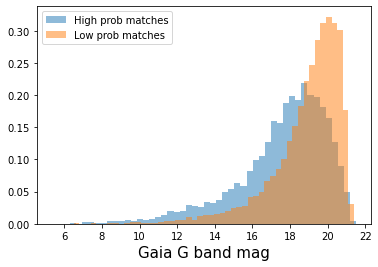

In [81]:
plt.hist(df_good['phot_g_mean_mag'],bins=50,alpha=0.5,density=True,label='High prob matches')
plt.hist(df_bad['phot_g_mean_mag'],bins=50,alpha=0.5,density=True,label='Low prob matches')
plt.xlabel('Gaia G band mag',size=15)
#plt.xscale('log')
plt.legend()
plt.savefig('Gaia_G_mag.pdf',dpi=300)

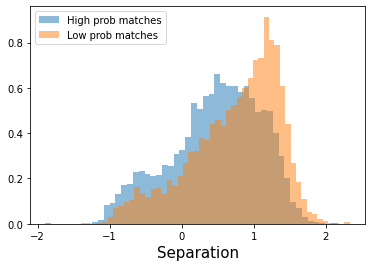

In [93]:
plt.hist(np.log10(100./df_good['phot_bp_mean_flux_over_error']),bins=50,alpha=0.5,density=True,label='High prob matches')
plt.hist(np.log10(100./df_bad['phot_bp_mean_flux_over_error']),bins=50,alpha=0.5,density=True,label='Low prob matches')
plt.xlabel('Separation',size=15)
#plt.xscale('log')
plt.legend()
#plt.savefig('Gaia_G_mag.pdf',dpi=300)

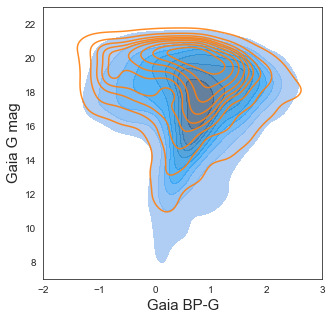

In [122]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
sns.kdeplot(x=df_good.bp_g, y=df_good.phot_g_mean_mag, label = 'High prob matches',shade=True,alpha=0.8)
sns.kdeplot(x=df_bad.bp_g, y=df_bad.phot_g_mean_mag, label = 'Low prob matches',shade=False,alpha=0.9)
plt.xlim(-2,3)
plt.ylim(7,23)
plt.xlabel('Gaia BP-G',size=15)
plt.ylabel('Gaia G mag',size=15)
plt.savefig('contour.pdf',dpi=300)
#plt.legend()

In [84]:
df_good['phot_bp_mean_flux']

10         9272.821941
11         5770.664338
45         1266.424933
68       183956.631949
75         6198.350925
             ...      
27038       121.188261
27040       428.416396
27044              NaN
27053      1033.642473
27069      9474.362573
Name: phot_bp_mean_flux, Length: 7328, dtype: float64

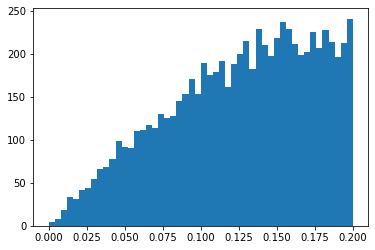

In [7]:
plt.hist(df_good['separation'],bins=50)
#plt.xlim(0,0.5)
plt.show()

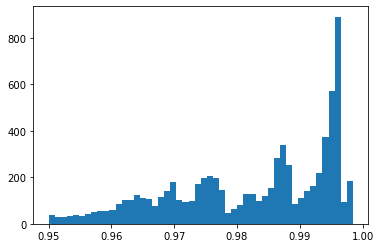

In [8]:
plt.hist(df_good['prob'],bins=50)
plt.show()

In [9]:
df_bad = pd.read_csv('unlikely_matches_plane.csv')

In [10]:
df_bad

,col1,ens,csc2_pref,csc2_id,csc2_ra,csc2_dec,csc2_mjr,csc2_mnr,csc2_alpha,tic_id,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,ruwe,objID,mag,Separation
0,2,2,2CXO,J172249.6-340731,260.706734,-34.125397,0.564860,0.498994,149.326996,157069725,...,NaN,NaN,NaN,NaN,NaN,NaN,1.101932,5.976082e+18,17.11998,0.002489
1,6,2,2CXO,J172251.0-341740,260.712829,-34.294690,1.689860,1.689860,0.000000,157067351,...,NaN,NaN,NaN,NaN,NaN,NaN,0.934721,5.976075e+18,19.63974,0.002082
2,11,2,2CXO,J172256.4-340535,260.735411,-34.093298,0.561330,0.561330,0.000000,1547317350,...,NaN,NaN,NaN,NaN,NaN,NaN,1.430620,5.976106e+18,19.67768,0.001924
3,13,2,2CXO,J172257.2-340050,260.738491,-34.013988,0.665873,0.573713,17.080000,157071264,...,NaN,NaN,NaN,NaN,NaN,NaN,0.951836,5.976107e+18,20.00656,0.002138
4,18,2,2CXO,J172258.4-340724,260.743430,-34.123564,0.419931,0.415290,114.171997,157069749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.976082e+18,20.09490,0.002424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12969,80464,215,2CXO,J104717.5-600426,161.823042,-60.074062,0.404601,0.399333,12.873000,391638666,...,1.451156,1.190778,1.553049,1.838219,1.675602,2.000836,0.976348,5.350290e+18,14.76322,0.002723
12970,80469,215,2CXO,J104717.5-601833,161.823155,-60.309283,0.510916,0.452499,148.798996,391641049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.350278e+18,20.65539,0.002715
12971,80479,215,2CXO,J104717.8-600535,161.824347,-60.093288,0.436435,0.422264,17.973000,934580836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.350290e+18,19.44008,0.002757
12972,80484,215,2CXO,J104717.8-600633,161.824499,-60.109224,0.401584,0.398585,66.470001,391638983,...,NaN,NaN,NaN,NaN,NaN,NaN,0.976052,5.350290e+18,18.83829,0.002565


In [11]:
df_good['phot_g_mean_flux'].values

array([27547.02104841, 14447.90842112,  4547.97549273, ...,
         143.9141916 ,  4992.13730025, 21659.70933245])

In [12]:
X1 = np.array([df_good['separation'].values, np.log10(df_good['phot_g_mean_flux'].values), np.log10(df_good['phot_g_mean_flux_error'].values), 
      np.log10(df_good['phot_g_mean_flux_over_error'].values), np.log10(df_good['phot_bp_mean_flux'].values), 
      np.log10(df_good['phot_bp_mean_flux_error'].values), np.log10(df_good['phot_bp_mean_flux_over_error'].values), 
      np.log10(df_good['phot_rp_mean_flux'].values), np.log10(df_good['phot_rp_mean_flux_error'].values), 
      np.log10(df_good['phot_rp_mean_flux_over_error'].values), np.log10(df_good['bp_rp'].values),
      np.log10(df_good['bp_g'].values), np.log10(df_good['g_rp'].values)])
#X1 = np.array([np.log10(df_good['phot_g_mean_flux'].values), np.log10(df_good['phot_g_mean_flux_error'].values), 
#      np.log10(df_good['phot_g_mean_flux_over_error'].values)])

/var/folders/14/ndt0htr925q12gxv25s271x00000gn/T/ipykernel_15642/496415149.py:5: RuntimeWarning: invalid value encountered in log10
  np.log10(df_good['phot_rp_mean_flux_over_error'].values), np.log10(df_good['bp_rp'].values),
/var/folders/14/ndt0htr925q12gxv25s271x00000gn/T/ipykernel_15642/496415149.py:6: RuntimeWarning: invalid value encountered in log10
  np.log10(df_good['bp_g'].values), np.log10(df_good['g_rp'].values)])


In [13]:
X1_train = X1.T[0:5400]

In [14]:
shape(X1_train)

(5400, 13)

In [15]:
X1_test = X1.T[5400:] 

In [16]:
X2 = np.array([df_bad['separation'].values, np.log10(df_bad['phot_g_mean_flux'].values), np.log10(df_bad['phot_g_mean_flux_error'].values), 
      np.log10(df_bad['phot_g_mean_flux_over_error'].values), np.log10(df_bad['phot_bp_mean_flux'].values), 
      np.log10(df_bad['phot_bp_mean_flux_error'].values), np.log10(df_bad['phot_bp_mean_flux_over_error'].values), 
      np.log10(df_bad['phot_rp_mean_flux'].values), np.log10(df_bad['phot_rp_mean_flux_error'].values), 
      np.log10(df_bad['phot_rp_mean_flux_over_error'].values), np.log10(df_bad['bp_rp'].values),
      np.log10(df_bad['bp_g'].values), np.log10(df_bad['g_rp'].values)])
#X2 = np.array([np.log10(df_bad['phot_g_mean_flux'].values), np.log10(df_bad['phot_g_mean_flux_error'].values), 
#      np.log10(df_bad['phot_g_mean_flux_over_error'].values)])

/var/folders/14/ndt0htr925q12gxv25s271x00000gn/T/ipykernel_15642/4012784119.py:5: RuntimeWarning: invalid value encountered in log10
  np.log10(df_bad['phot_rp_mean_flux_over_error'].values), np.log10(df_bad['bp_rp'].values),
/var/folders/14/ndt0htr925q12gxv25s271x00000gn/T/ipykernel_15642/4012784119.py:6: RuntimeWarning: invalid value encountered in log10
  np.log10(df_bad['bp_g'].values), np.log10(df_bad['g_rp'].values)])


In [17]:
X2_train = X2.T[0:10000]

In [18]:
X2_test = X2.T[10000:]

In [19]:
shape(X2_test)

(2974, 13)

In [20]:
X_train = np.concatenate((X1_train,X2_train), axis=0)

In [21]:
X_test = np.concatenate((X1_test,X2_test), axis=0)

In [22]:
Y1_train = np.ones(5400)

In [23]:
Y1_test = np.ones(1928)

In [24]:
Y2_train = np.zeros(10000)

In [25]:
Y2_test = np.zeros(2974)

In [26]:
Y_train = np.concatenate((Y1_train,Y2_train), axis=0)

In [27]:
Y_test = np.concatenate((Y1_test,Y2_test), axis=0)

In [28]:
print(shape(X_train),shape(Y_train))

(15400, 13) (15400,)


In [29]:
arr = np.arange(15400)
np.random.shuffle(arr)
arr

array([11920,  6233,  9119, ...,  9159, 15143, 13798])

In [30]:
X_train = X_train[arr]

In [31]:
Y_train = Y_train[arr]

In [32]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [33]:
print(shape(X_test),shape(Y_test))

(4902, 13) (4902,)


In [37]:
arr = np.arange(4902)
np.random.shuffle(arr)
arr

array([4239, 1049, 4347, ..., 4684, 3047, 1116])

In [38]:
X_test = X_test[arr]

In [39]:
Y_test = Y_test[arr]

In [40]:
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [41]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
network.add(layers.Dense(64, activation='relu', input_shape=(128,)))
network.add(layers.Dense(1, activation='sigmoid'))

2022-03-08 22:04:22.487108: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-08 22:04:22.501160: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe4c40e7330 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-08 22:04:22.501173: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [42]:
from tensorflow.keras import optimizers
#Adagrad = optimizers.Adagrad
#Adagrad['lr']
Adagrad = optimizers.Adagrad(lr=0.005)
network.compile(optimizer=Adagrad,
                loss='binary_crossentropy',
                metrics=['binary_accuracy'])
#optimizer.lr.set_value(0.02)

In [43]:
history = network.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=256)

Epoch 1/200
49/49 [==============================] - 0s 3ms/step - loss: 0.6498 - binary_accuracy: 0.6468 - val_loss: 0.6389 - val_binary_accuracy: 0.6451
Epoch 2/200
49/49 [==============================] - 0s 1ms/step - loss: 0.6274 - binary_accuracy: 0.6507 - val_loss: 0.6268 - val_binary_accuracy: 0.6451
Epoch 3/200
49/49 [==============================] - 0s 996us/step - loss: 0.6135 - binary_accuracy: 0.6567 - val_loss: 0.6136 - val_binary_accuracy: 0.6831
Epoch 4/200
49/49 [==============================] - 0s 996us/step - loss: 0.6015 - binary_accuracy: 0.6735 - val_loss: 0.6034 - val_binary_accuracy: 0.6568
Epoch 5/200
49/49 [==============================] - 0s 1ms/step - loss: 0.5912 - binary_accuracy: 0.6814 - val_loss: 0.5915 - val_binary_accuracy: 0.6951
Epoch 6/200
49/49 [==============================] - 0s 969us/step - loss: 0.5820 - binary_accuracy: 0.6941 - val_loss: 0.5868 - val_binary_accuracy: 0.7114
Epoch 7/200
49/49 [==============================] - 0s 995us/st

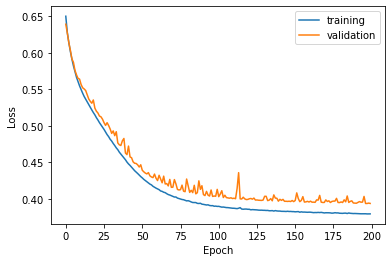

In [44]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_nn_v2.pdf')

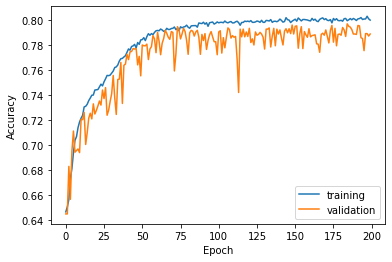

In [45]:
plt.plot(history.history['binary_accuracy'],label='training')
plt.plot(history.history['val_binary_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc_nn_v2.pdf')

In [ ]:
print('\n# Evaluate on test data')
results = network.evaluate(X_test, Y_test, batch_size=256)
print('test loss, test acc:', results)


# Evaluate on test data
10050/10050 [==============================] - 0s 4us/step
test loss, test acc: [0.5509259144702361, 0.7345273633264191]


In [ ]:
for i in range(100):
    print(network.predict_classes(X_test)[i], Y_test[i])

[0] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[0] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[1] 1.0
[0] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[0] 0.0
[0] 0.0
[1] 0.0
[1] 1.0
[1] 0.0
[1] 1.0
[1] 0.0
[1] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[0] 1.0
[1] 1.0
[0] 0.0
[0] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[1] 1.0
[1] 0.0
[1] 1.0
[1] 0.0
[0] 1.0
[0] 1.0
[1] 0.0
[1] 0.0
[0] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[0] 1.0
[0] 0.0
[1] 1.0
[0] 0.0
[1] 1.0
[1] 0.0
[0] 1.0
[0] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[1] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 0.0
[0] 1.0
[0] 0.0
[1] 1.0
[0] 1.0
[1] 1.0
[1] 0.0
[1] 1.0
[1] 0.0
[1] 0.0
[1] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[0] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0
[0] 0.0


In [ ]:
print(Y_test[4])

1.0
